In [43]:
# import pandas and numpy libraries
import numpy as np
import pandas as pd

In [44]:
# Load the data set
df = pd.read_csv('spam.csv', encoding='iso-8859-1')

In [45]:
# Displays the first head of data
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

## STEPS TO ACHIEVE GOALS

In [46]:
# BELOW ARE THE LIST OF OBJECTIVES TO ACHIEVE OUR AIM

# 1. Data cleaninng (Removing all nan values)
# 2. Explolatory Data Analysis (EDA)
# 3. Text Preprocessing
# 4. Model Building and Hyper-parameter-tunning
# 5. Model Evaluation
# 6. Website
# 7. Deployment

## 1. Data cleaning

In [47]:
#To see shape of the data
df.shape

(5572, 5)

In [48]:
# displays all null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [49]:
# From the info above our dataset has missing values from unamed: 2 - unamed: 4.
# so we drop them.
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [50]:
# drop the colums with inplace=True to effect the change
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)


In [51]:
# Check out datasets after dropping NaN columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [52]:
#rename the columns to a more describtive name
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head(20)

target                                               text
0     ham  Go until jurong point, crazy.. Available only ...
1     ham                      Ok lar... Joking wif u oni...
2    spam  Free entry in 2 a wkly comp to win FA Cup fina...
3     ham  U dun say so early hor... U c already then say...
4     ham  Nah I don't think he goes to usf, he lives aro...
5    spam  FreeMsg Hey there darling it's been 3 week's n...
6     ham  Even my brother is not like to speak with me. ...
7     ham  As per your request 'Melle Melle (Oru Minnamin...
8    spam  WINNER!! As a valued network customer you have...
9    spam  Had your mobile 11 months or more? U R entitle...
10    ham  I'm gonna be home soon and i don't want to tal...
11   spam  SIX chances to win CASH! From 100 to 20,000 po...
12   spam  URGENT! You have won a 1 week FREE membership ...
13    ham  I've been searching for the right words to tha...
14    ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15   spam  XXXMobileMovieClub: To use your credit, click ...
16    ham                         Oh k...i'm watching here:)
17    ham  Eh u remember how 2 spell his name... Yes i di...
18    ham  Fine if thatåÕs the way u feel. ThatåÕs the wa...
19   spam  England v Macedonia - dont miss the goals/team...

In [53]:
# displays columns
df.columns

Index(['target', 'text'], dtype='object')

In [54]:
# Get target columns
target = df['target']
print(f'target before encoding:')
target.head(20)

target before encoding:


0      ham
1      ham
2     spam
3      ham
4      ham
5     spam
6      ham
7      ham
8     spam
9     spam
10     ham
11    spam
12    spam
13     ham
14     ham
15    spam
16     ham
17     ham
18     ham
19    spam
Name: target, dtype: object

In [59]:
# Encoding the data labels to numerical category
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X = text

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(df['target'])
df['target'] = encoder.fit_transform(df['target'])


In [60]:
print(f'target after encoding:')
encoded_target[:20]

target after encoding:


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [63]:
df.head(10)

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...
5       1  FreeMsg Hey there darling it's been 3 week's n...
6       0  Even my brother is not like to speak with me. ...
7       0  As per your request 'Melle Melle (Oru Minnamin...
8       1  WINNER!! As a valued network customer you have...
9       1  Had your mobile 11 months or more? U R entitle...

In [65]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [66]:
# check for duplicate values
df.duplicated().sum()

403

In [69]:
# drop duplicates and leaving the first
df = df.drop_duplicates(keep='first')

In [75]:
# Check duplicates again
print(f"Duplicate count = {df.duplicated().sum()}")
print(f"Shape is {df.shape}")

Duplicate count = 0
Shape is (5169, 2)


## 2. EDA

In [96]:
 df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

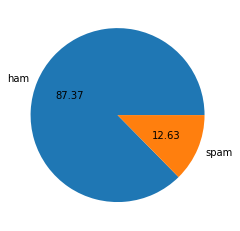

In [97]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [98]:
# We have imbalanced data fro the above

In [99]:
import nltk
import ssl


In [100]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
# Get number of characters
df['num_characters'] = df['text'].apply(len)
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24             24  
1          8              8  
2         37             37  
3         13             13  
4         15             15

In [114]:
# Get number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24             24  
1          8              8  
2         37             37  
3         13             13  
4         15             15

In [119]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [126]:
# statistical description of dataset
df[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.453279       1.947185
std         58.236293    13.324793       1.362406
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      28.000000

In [127]:
# statistical description of all hams
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.120903       1.799601
std         56.358207    13.493725       1.278465
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      28.000000

In [129]:
# statistical description of spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.967841
std         30.137753    7.008418       1.483201
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       8.000000

In [131]:
import seaborn as sns 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

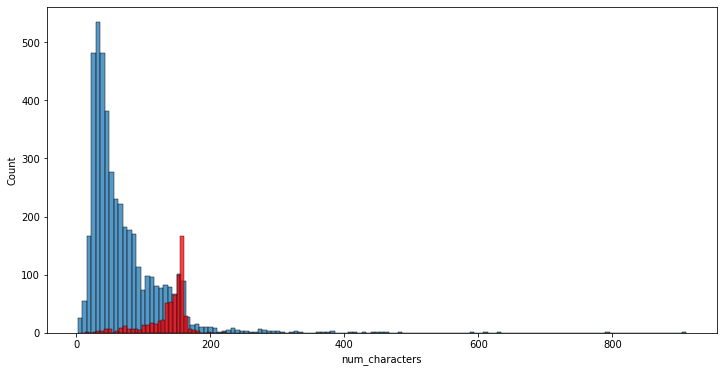

In [134]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

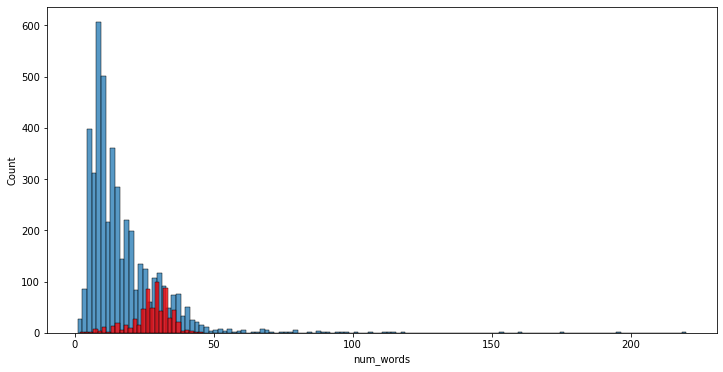

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

In [136]:
 sns.pairplot(df, hue='target')

In [ ]:
sns.heatmap(df.corr())